In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('student-mat.csv')
data.head()

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                                                                 
1  GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
2  GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";...                                                                                                                                                                                 
3  GP;"F";15;"U";"GT3";"T";4;2;"health";"services...                                                                                                                                                                                 
4  GP;"F";16;"U";"GT3";"T";3;3;"other";"other";"h...

In [6]:
# Check data shape and basic information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

Dataset Shape: (395, 1)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                               --------------  ----- 
 0   school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [7]:
# Display data summary statistics
print("Dataset Description:")
print(data.describe())
print("\n" + "="*50)
print("Data Types:")
print(data.dtypes)

Dataset Description:
       school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
count                                                 395                                                                                                                                                                                 
unique                                                395                                                                                                                                                                                 
top     MS;"M";19;"U";"LE3";"T";1;1;"other";"at_home";...                                                                                                                                                                                 
freq                                   

In [8]:
# Check for missing values and unique values
print("Missing Values:")
print(data.isnull().sum())
print("\n" + "="*50)
print("Unique values in each column:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")
print("\n" + "="*50)
print("First 5 rows and last 5 rows:")
print("Head:")
print(data.head())
print("\nTail:")
print(data.tail())

Missing Values:
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64

Unique values in each column:
school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3: 395 unique values

First 5 rows and last 5 rows:
Head:
  school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0  GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher...                                                                                                                                             

# Data Formatting and Cleaning

Now we'll format and clean the data for better analysis:

In [9]:
# Format column names (remove spaces, standardize case)
print("Original column names:")
print(data.columns.tolist())

# Clean column names - remove extra spaces and standardize
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
data.columns = data.columns.str.replace(' ', '_')  # Replace spaces with underscores
data.columns = data.columns.str.lower()  # Convert to lowercase

print("\nFormatted column names:")
print(data.columns.tolist())

Original column names:
['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3']

Formatted column names:
['school;sex;age;address;famsize;pstatus;medu;fedu;mjob;fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;dalc;walc;health;absences;g1;g2;g3']


In [10]:
# Format categorical variables
# Convert categorical columns to proper categories
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())

# Display unique values for categorical columns (first few for brevity)
for col in categorical_cols[:5]:  # Show first 5 categorical columns
    print(f"\n{col} unique values:")
    print(data[col].unique())

Categorical columns: ['school;sex;age;address;famsize;pstatus;medu;fedu;mjob;fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;dalc;walc;health;absences;g1;g2;g3']

school;sex;age;address;famsize;pstatus;medu;fedu;mjob;fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;dalc;walc;health;absences;g1;g2;g3 unique values:
['GP;"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6'
 'GP;"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6'
 'GP;"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10'
 'GP;"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"

In [11]:
# Format numerical variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols.tolist())

# Check for outliers using IQR method for numerical columns
print("\nOutlier Analysis (using IQR method):")
for col in numerical_cols[:5]:  # Show first 5 numerical columns
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

Numerical columns: []

Outlier Analysis (using IQR method):


In [13]:
# Data visualization for better understanding
plt.figure(figsize=(15, 10))

# Plot histogram for numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 3) // 4  # 4 columns per row

for i, col in enumerate(numerical_cols[:8]):  # Show first 8 numerical columns
    plt.subplot(n_rows, 4, i+1)
    plt.hist(data[col], bins=20, alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

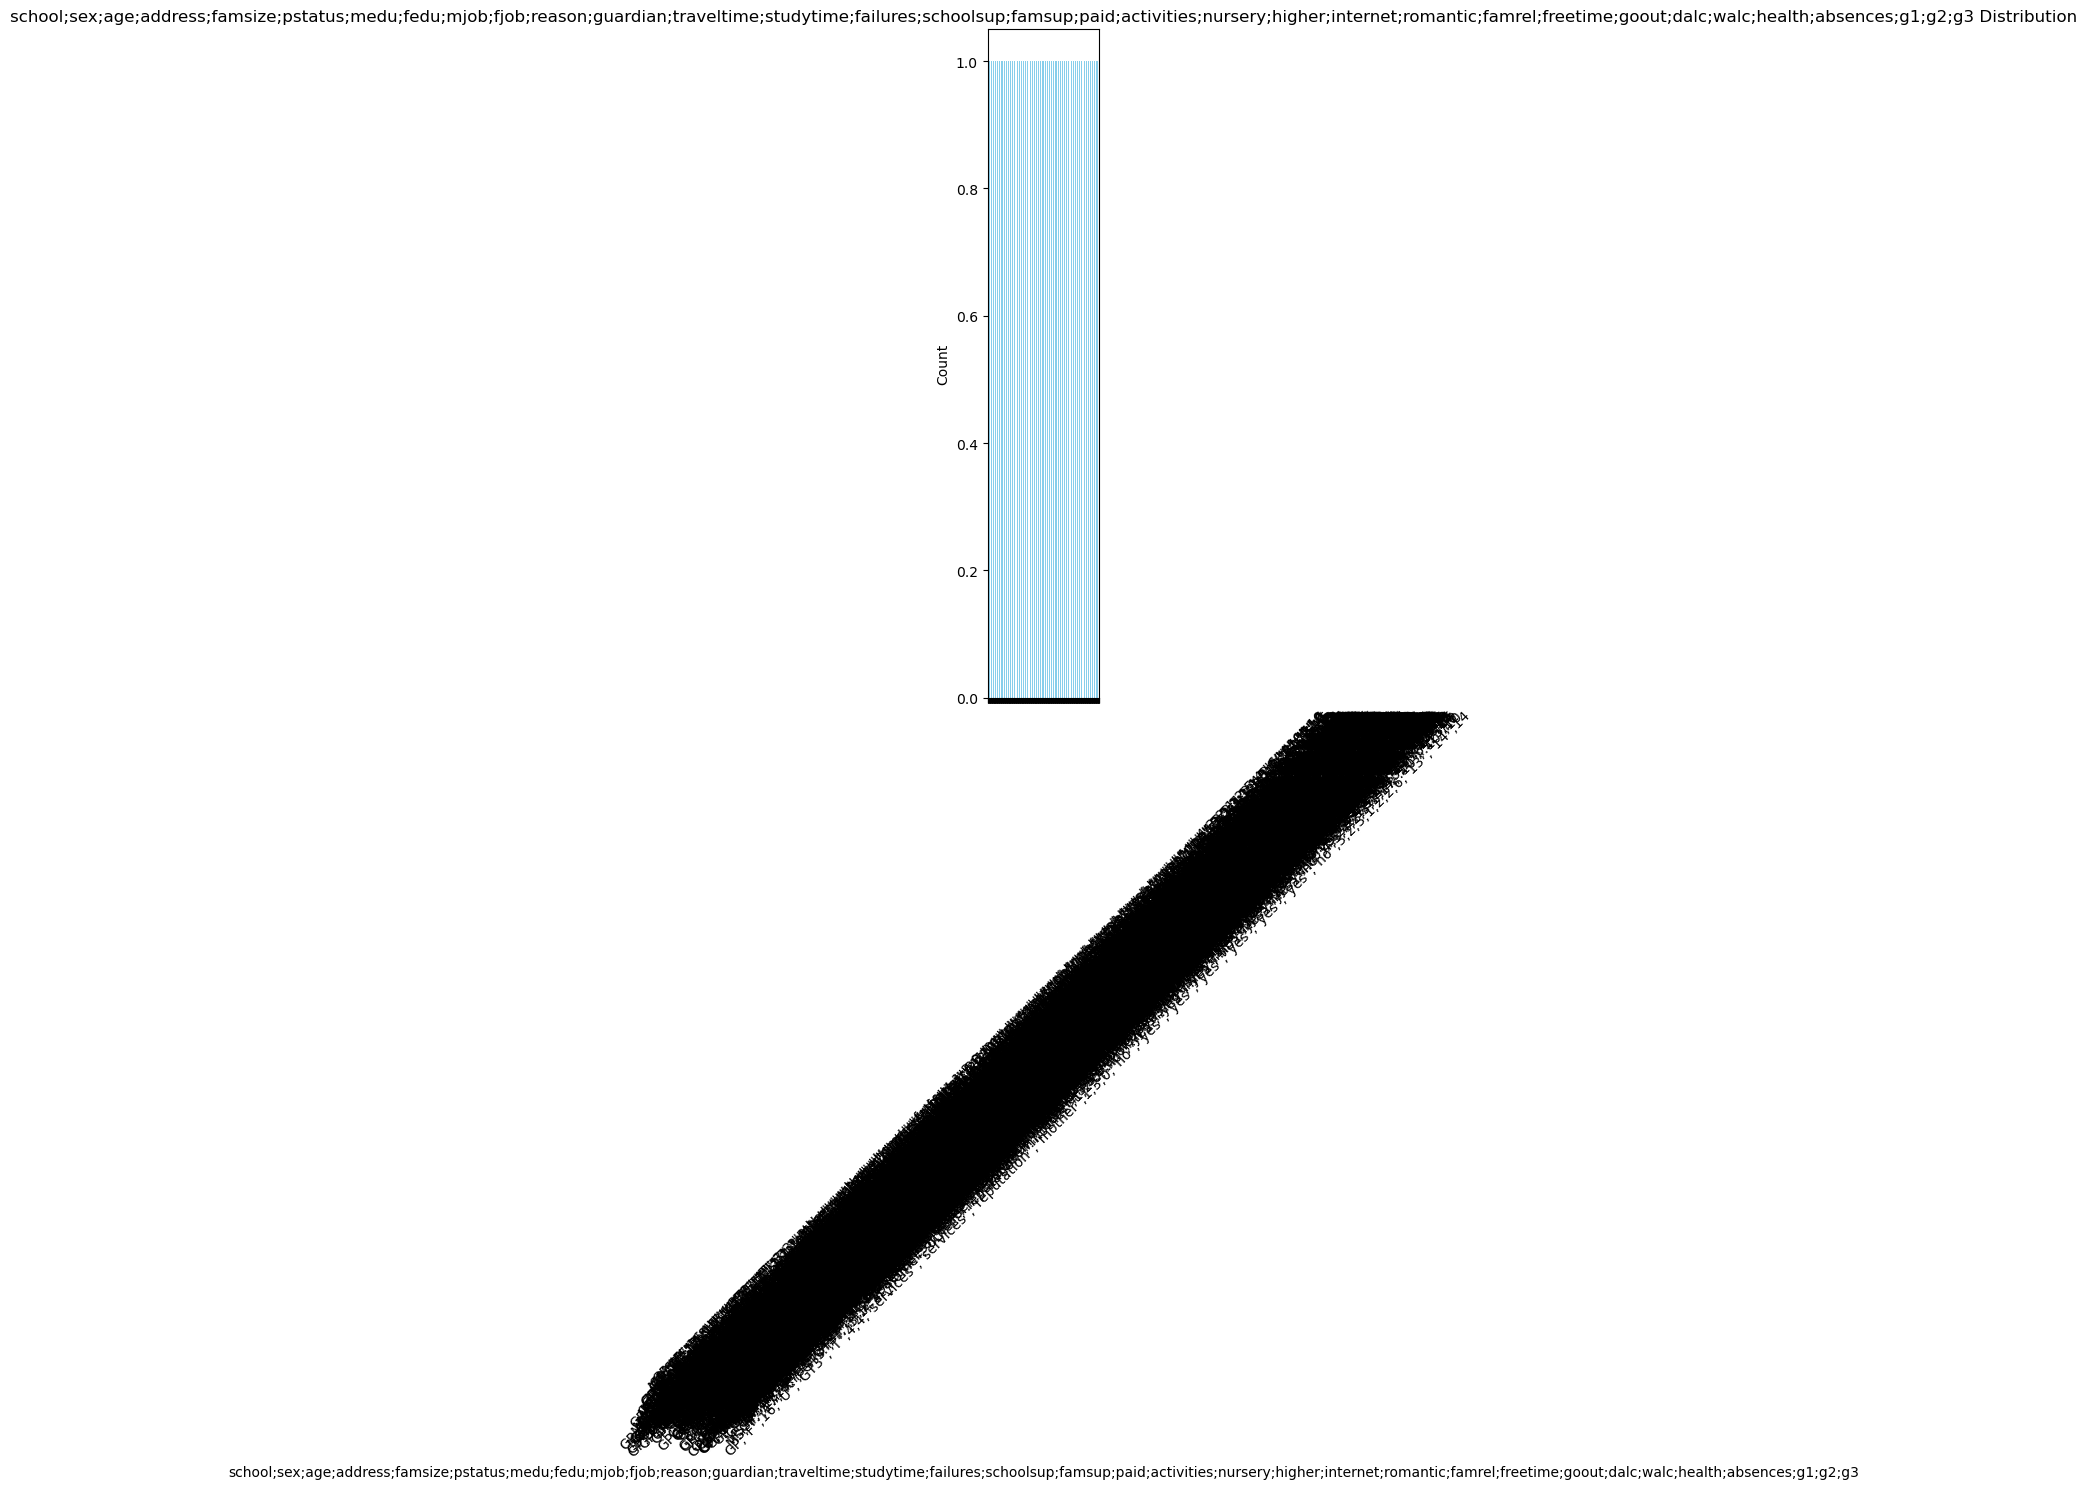

In [14]:
# Categorical columns visualization (column-wise)
categorical_cols = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))

n_categorical = len(categorical_cols)
n_rows = (n_categorical + 3) // 4  # 4 columns per row

for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, 4, i+1)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [15]:
# Specific categorical columns visualization
columns_to_plot = ['sex', 'school', 'address', 'famsize', 'pstatus']  # আপনার পছন্দের columns

plt.figure(figsize=(20, 10))

for i, col in enumerate(columns_to_plot):
    if col in data.columns:
        plt.subplot(2, 3, i+1)
        sns.countplot(data=data, x=col, palette='Set2')
        plt.title(f'{col.capitalize()} Distribution')
        plt.xlabel(col.capitalize())
        plt.ylabel('Count')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

/tmp/ipykernel_10393/1633214257.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


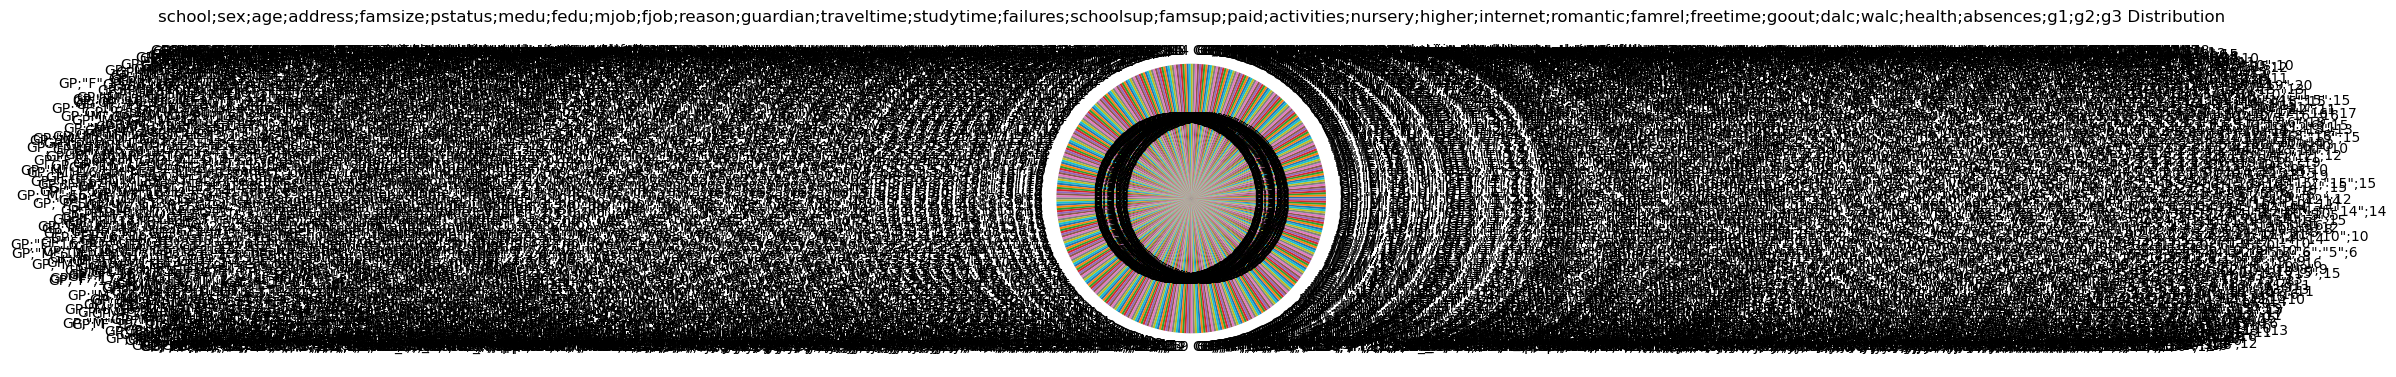

In [16]:
# Pie charts for categorical data (column-wise view)
categorical_cols = data.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 15))

for i, col in enumerate(categorical_cols[:8]):  # First 8 categorical columns
    plt.subplot(2, 4, i+1)
    data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'{col} Distribution')
    plt.ylabel('')  # Remove default ylabel

plt.tight_layout()
plt.show()

/tmp/ipykernel_10393/1628759625.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


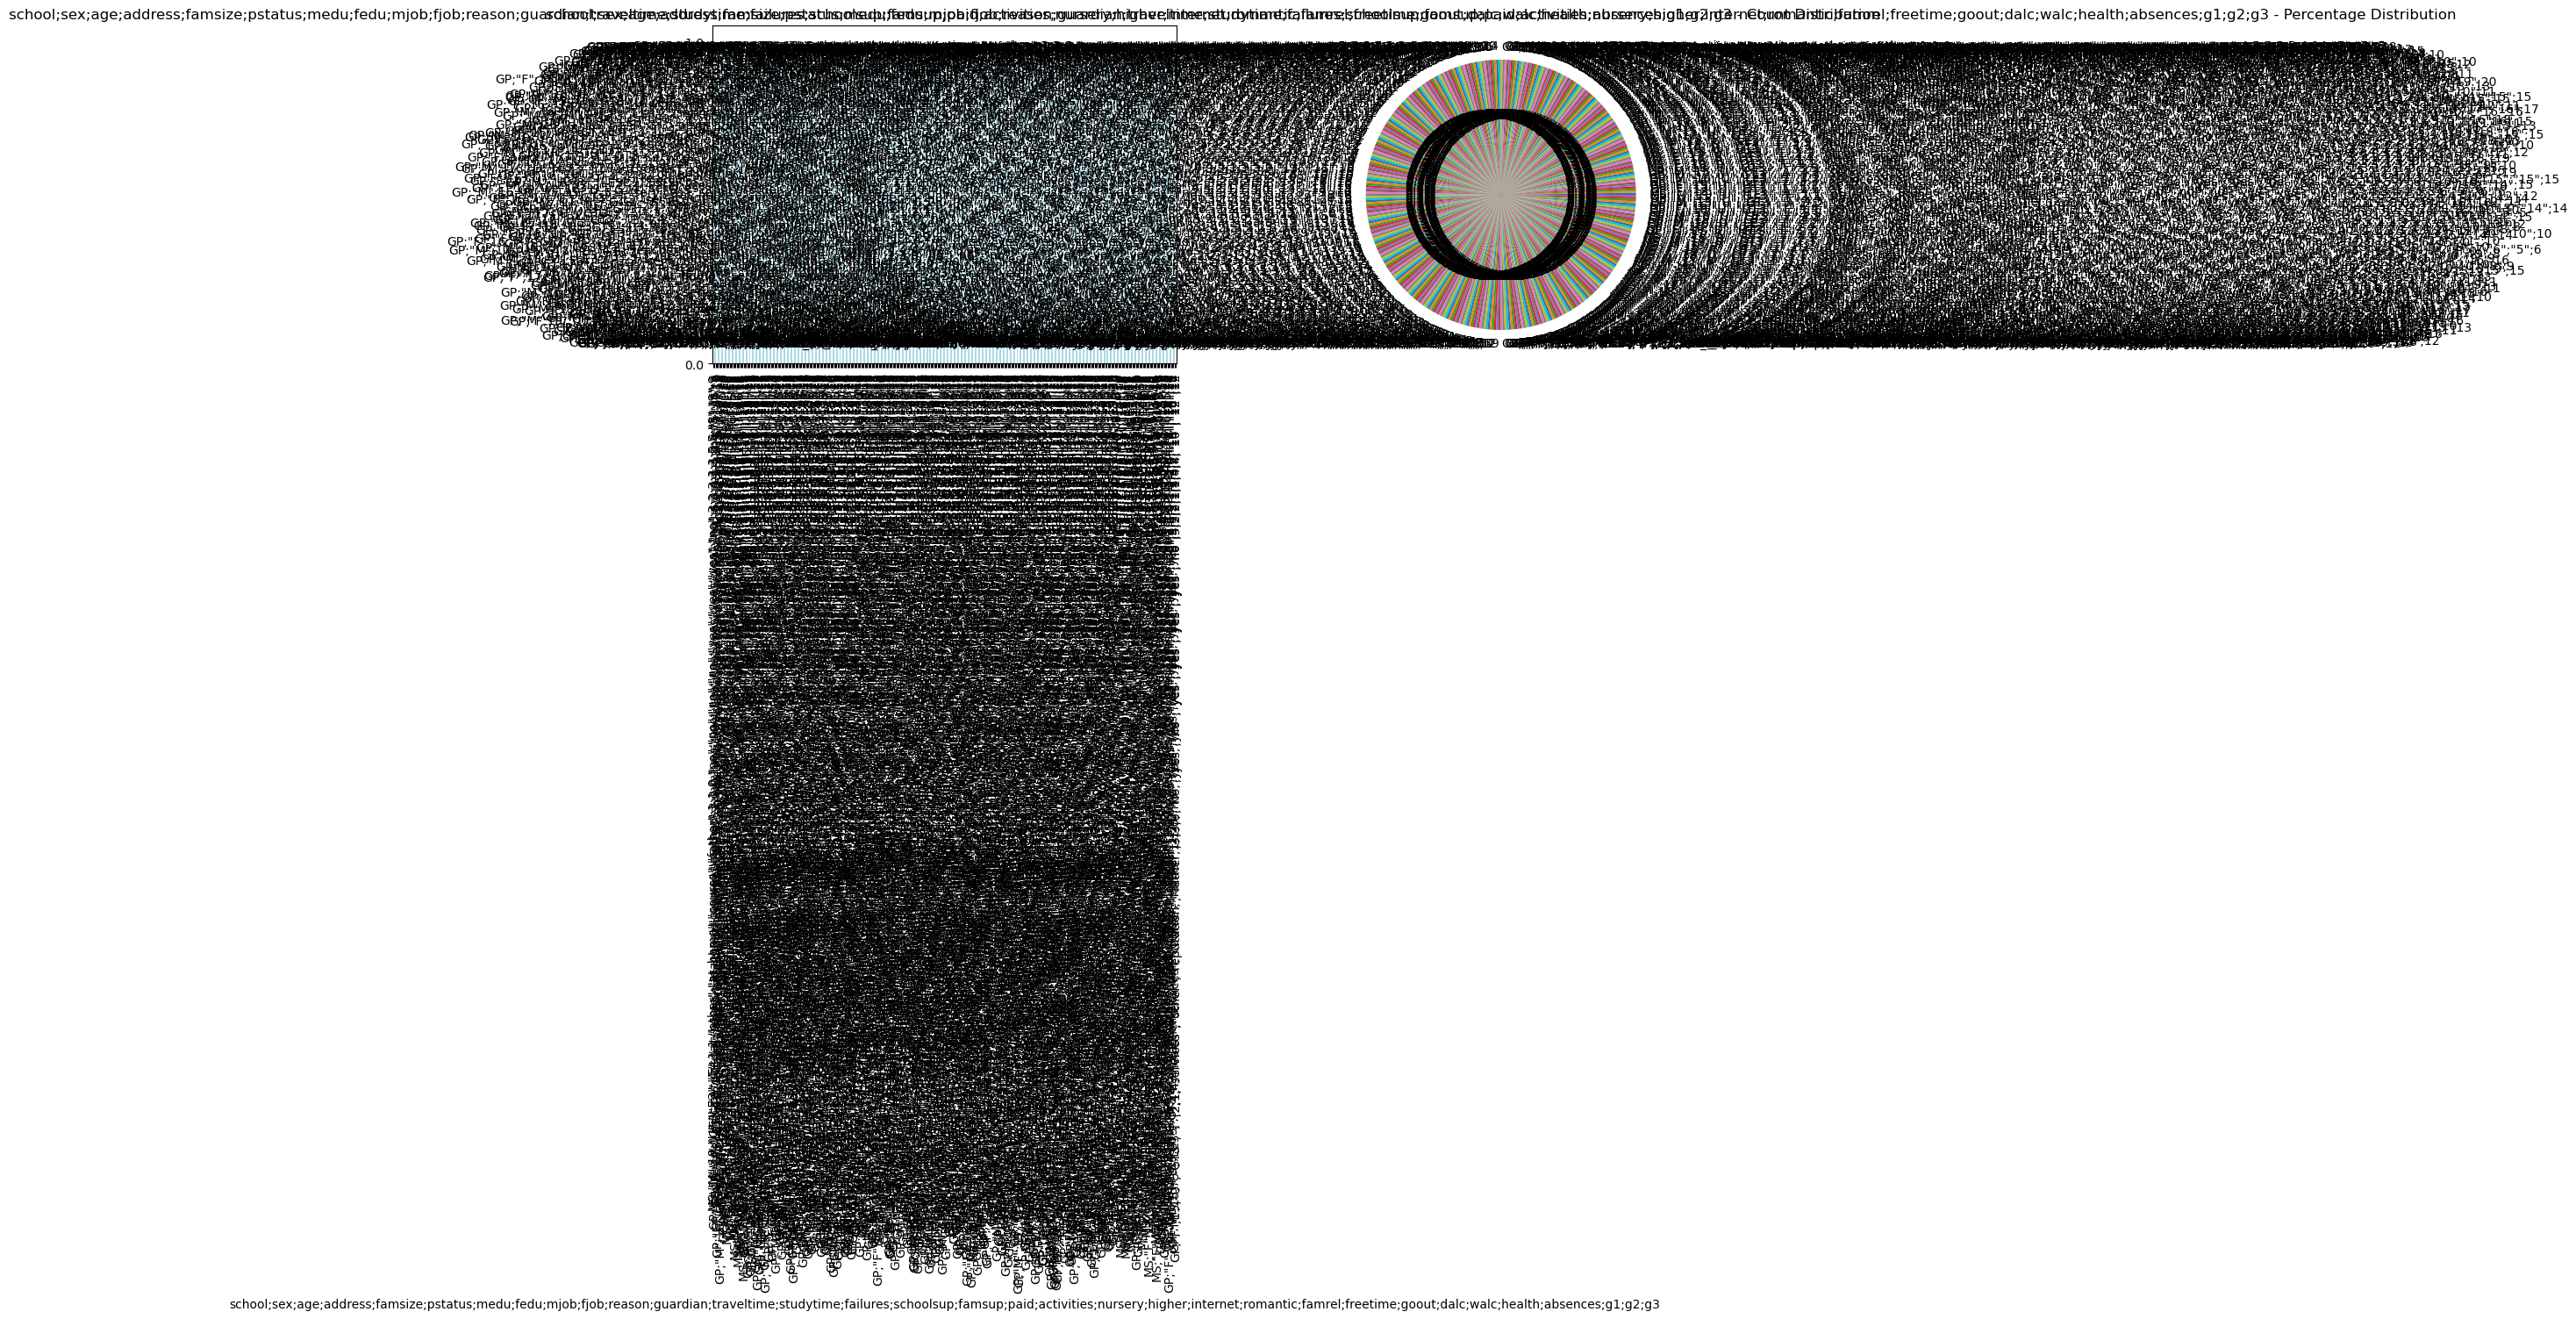

In [18]:
# Column-wise analysis with both count and percentage
categorical_cols = data.select_dtypes(include=['object']).columns

if len(categorical_cols) == 0:
    print("No categorical columns found in the dataset")
elif len(categorical_cols) == 1:
    # Handle single categorical column case
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    col = categorical_cols[0]
    
    # Count plot
    data[col].value_counts().plot(kind='bar', ax=axes[0], color='lightblue')
    axes[0].set_title(f'{col} - Count Distribution')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')
    
    # Pie chart
    data[col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title(f'{col} - Percentage Distribution')
    axes[1].set_ylabel('')
else:
    # Handle multiple categorical columns case
    fig, axes = plt.subplots(len(categorical_cols), 2, figsize=(15, 5*len(categorical_cols)))
    
    for i, col in enumerate(categorical_cols):
        # Count plot
        data[col].value_counts().plot(kind='bar', ax=axes[i,0], color='lightblue')
        axes[i,0].set_title(f'{col} - Count Distribution')
        axes[i,0].set_xlabel(col)
        axes[i,0].set_ylabel('Count')
        
        # Pie chart
        data[col].value_counts().plot(kind='pie', ax=axes[i,1], autopct='%1.1f%%')
        axes[i,1].set_title(f'{col} - Percentage Distribution')
        axes[i,1].set_ylabel('')

plt.tight_layout()
plt.show()